# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
current_btc_price = btc_data['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_data = requests.get(eth_url).json()
current_eth_price = eth_data['data']['1027']['quotes']['USD']['price']


In [6]:
current_btc_price

11348.11

In [7]:
current_eth_price

367.68

In [8]:
# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth
total_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your combined holdings are ${total_crypto_value:0.2f}")

The current value of your 1.2 BTC is $13617.73
The current value of your 5.3 ETH is $1948.70
The current value of your combined holdings are $15566.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [11]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


# Get current closing prices for SPY and AGG
stock_data_df = alpaca.get_barset(
    ["AGG","SPY"], 
    timeframe=timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
stock_data_df.index = stock_data_df.index.date
stock_data_df

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2020-10-15  118.15  118.15  117.96  117.97  4988612  343.71  348.02  343.13   

                              
             close    volume  
2020-10-15  347.51  50665477

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(stock_data_df['AGG']['close'])
spy_close_price = float(stock_data_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $347.51


In [14]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
total_stock_value = my_agg_value + my_spy_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your combined shares are ${total_stock_value:0.2f}")

The current value of your 50 SPY shares is $17375.50
The current value of your 200 AGG shares is $23594.00
The current value of your combined shares are $40969.50


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_amounts = {
    "amounts" : [total_crypto_value,total_stock_value]
}

assets = ["crypto","shares"]

df_savings = pd.DataFrame(total_amounts, index=assets)

# Display savings DataFrame
display(df_savings)

,amounts
crypto,15566.436
shares,40969.500


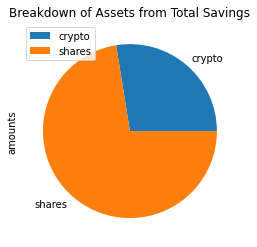

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amounts", title="Breakdown of Assets from Total Savings", legend=True);

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amounts"].sum()

over_under = total_savings-emergency_fund

# Validate saving health
if total_savings >= emergency_fund:
        print(f"Congratulations! Your emergency fund is met and you have ${over_under:.2f} left over.")
elif total_savings == emergency_fund:
        print(f"Congratulations! You have met your emergency fund goal. However, you have ${over_under:.2f} left over. Make sure to keep saving!")
else:
        print(f"You have not met your emergency fund goal. You are ${over_under:.2f} from your goal.")
        

Congratulations! Your emergency fund is met and you have $20535.94 left over.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe="1D",
    start=start_date,
    end=end_date
).df

df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data

AGG                                            SPY            \
              open      high       low   close     volume    open      high   
2015-10-16  109.90  109.9400  109.7800  109.78  1497588.0  202.83  203.2900   
2015-10-19  109.78  109.8950  109.6500  109.85  1289942.0  202.50  203.3700   
2015-10-20  109.64  109.7800  109.5500  109.65  1672562.0  202.85  203.8400   
2015-10-21  109.73  109.9500  109.7300  109.89  1119723.0  203.61  203.7900   
2015-10-22  109.90  110.0500  109.8300  109.94  1817244.0  202.98  205.5100   
...            ...       ...       ...     ...        ...     ...       ...   
2020-10-12  117.85  117.9400  117.7700  117.93  2770157.0  349.59  354.0200   
2020-10-13  118.01  118.0700  117.9294  118.01  3250338.0  352.28  352.4651   
2020-10-14  118.10  118.1100  117.9850  118.04  3295967.0  350.75  351.9300   
2020-10-15  118.15  118.1500  117.9600  117.97  4988612.0  343.71  348.0200   
2020-10-16  117.99  118.0778  117.8800  117.88  3589312.0  348.96  350.7500   

                                         
                 low   close     volume  
2015-10-16  201.9200  203.14   79323870  
2015-10-19  202.1300  203.33   61255929  
2015-10-20  202.5471  203.07   60081395  
2015-10-21  201.6500  201.82   83704739  
2015-10-22  202.8100  205.22  121670959  
...              ...     ...        ...  
2020-10-12  349.0600  352.43   61163344  
2020-10-13  349.0900  350.15   62272512  
2020-10-14  347.1400  347.97   47281475  
2020-10-15  343.1300  347.51   50665477  
2020-10-16  347.1000  347.25   62467863  

[1260 rows x 10 columns]

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = [.4,.6]

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                                      SPY  \
              open     high     low   close     volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588.0          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942.0     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562.0    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723.0     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244.0     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014573,1.005108,1.001911,1.010108,0.997463,1.002939,1.010156,0.994645,1.001355,1.000056,...,0.997850,1.006070,0.999523,1.004877,1.009252,1.000793,1.004119,1.001289,0.982136,1.008592
2,1.012150,0.999545,0.991057,1.014000,0.989496,1.013809,1.008361,0.991324,1.002858,1.006437,...,1.012847,1.011673,1.009419,1.007955,0.999727,1.004466,1.001426,0.993621,0.982989,1.011705
3,1.013933,0.994840,1.005855,1.024996,0.986655,1.031122,1.001698,0.986991,1.000937,1.013287,...,1.007993,1.010283,1.003846,1.004247,1.008711,1.009097,1.012207,0.987564,0.987341,1.006254
4,1.016606,0.998090,1.013129,1.032800,0.983847,1.038004,1.009355,0.988363,1.001948,1.009465,...,1.008169,1.015958,0.999921,1.007496,1.008290,1.013691,1.003011,0.985654,0.997468,1.012265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.380892,8.223200,8.085965,7.030545,15.696769,19.160305,17.585498,10.838589,15.129566,6.491485,...,6.823460,6.048745,6.473684,4.925198,15.475449,9.425007,10.091295,4.681073,6.251808,5.569911
7557,4.345055,8.285551,8.091349,7.021485,15.617479,19.312619,17.530172,10.866947,15.084652,6.446006,...,6.795824,6.030796,6.440633,4.895618,15.498957,9.508644,10.042296,4.628093,6.294730,5.571553
7558,4.360096,8.272979,8.111947,7.013581,15.936996,19.250079,17.564768,10.917027,15.303958,6.458360,...,6.705490,6.047292,6.332310,4.932063,15.464373,9.595467,10.055828,4.654002,6.334905,5.601669
7559,4.283811,8.220517,7.902771,6.954749,16.004299,19.173915,17.605776,11.010186,15.323068,6.516196,...,6.675029,6.043830,6.322545,4.974507,15.497481,9.532217,10.028042,4.679033,6.296581,5.561631


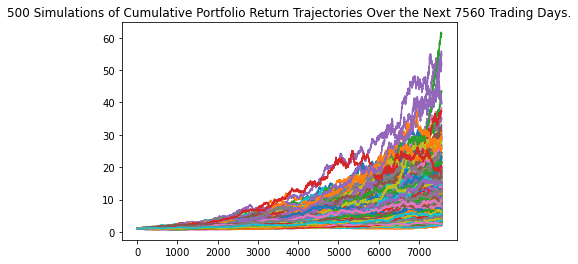

In [26]:
# Plot simulation outcomes
MC_30year_plot = MC_30year.plot_simulation()

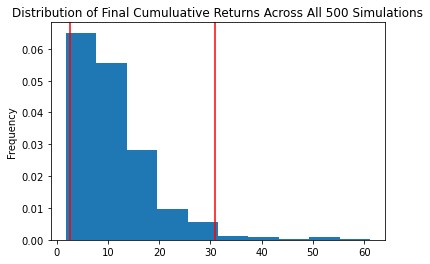

In [27]:
# Plot probability distribution and confidence intervals
MC_30year_dist_plot = MC_30year.plot_distribution()


### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30year_tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(MC_30year_tbl)

count           500.000000
mean             11.431537
std               8.061094
min               1.807576
25%               6.081041
50%               9.209498
75%              14.578122
max              61.131185
95% CI Lower      2.692174
95% CI Upper     30.947548
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30year_tbl[8]*initial_investment,2)
ci_upper = round(MC_30year_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53843.48 and $618950.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20_000 * 1.50

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30year_tbl[8]*initial_investment,2)
ci_upper = round(MC_30year_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${int(initial_investment)} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $80765.22 and $928426.44


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
weights = [.3,.7]

MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_5year.portfolio_data.head()

AGG                                                      SPY  \
              open     high     low   close     volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588.0          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942.0     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562.0    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723.0     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244.0     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997598,0.989992,0.997762,0.997333,1.007565,1.003796,0.997464,1.001188,0.984264,1.007015,...,0.996559,0.999856,0.997659,1.000245,1.009733,1.007257,1.011997,1.005212,1.002927,1.003255
2,0.995270,0.991930,1.001605,1.002427,1.012191,1.017891,0.981167,1.004147,0.989922,1.009228,...,0.999009,1.001872,0.998060,0.999935,1.024988,0.991212,1.006857,1.004444,1.006561,0.991248
3,0.984403,1.007945,1.009493,0.997941,1.025024,1.023811,0.975916,1.005528,0.982108,1.003849,...,1.005519,1.009544,0.997992,0.996507,1.019534,0.991716,0.999060,1.004763,1.006518,0.983908
4,0.989148,1.000893,1.013583,0.995931,1.027090,1.032019,0.981519,1.000990,0.982822,1.009863,...,0.995917,1.021047,0.999789,0.999143,1.006457,1.001805,1.011079,0.993505,0.994573,0.973567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.210573,1.619897,2.019867,1.231953,1.378021,1.426350,0.866974,1.381611,1.031358,1.724020,...,1.511794,1.441372,1.833831,1.615400,2.036754,1.539322,1.433096,1.350293,2.081021,1.821327
1257,1.209182,1.605810,1.988013,1.232136,1.373698,1.435059,0.879293,1.374612,1.029920,1.733458,...,1.519889,1.459007,1.840306,1.625096,2.046503,1.559955,1.461318,1.349937,2.071280,1.808362
1258,1.198698,1.610525,2.002869,1.212465,1.366910,1.455334,0.884279,1.381803,1.042077,1.753255,...,1.520563,1.459703,1.820605,1.631821,2.058369,1.561209,1.455138,1.362465,2.062434,1.790063
1259,1.185165,1.607930,1.993330,1.219294,1.360140,1.444006,0.901678,1.388585,1.039780,1.765486,...,1.508050,1.447315,1.812209,1.656646,2.060110,1.562604,1.440979,1.363988,2.073086,1.803337


# Plot simulation outcomes


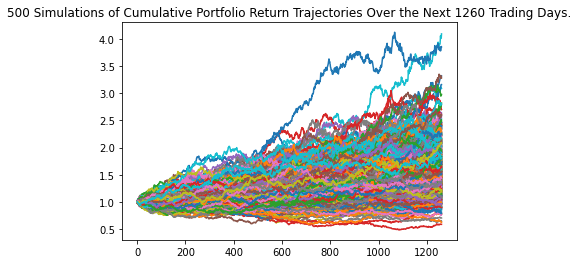

In [33]:
MC_5year.plot_simulation();

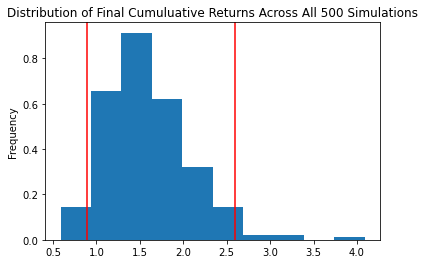

In [34]:
# Plot probability distribution and confidence intervals
MC_5year.plot_distribution();

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5year_tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(MC_5year_tbl)

count           500.000000
mean              1.581980
std               0.476640
min               0.586235
25%               1.240884
50%               1.520590
75%               1.839149
max               4.090645
95% CI Lower      0.887981
95% CI Upper      2.593795
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment_5year = 90_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5year = round(MC_5year_tbl[8]*initial_investment_5year,2)
ci_upper_5year = round(MC_5year_tbl[9]*initial_investment_5year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5year} and ${ci_upper_5year}")

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 5 years will end within in the range of $79918.27 and $233441.54


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
weights = [.3,.7]

MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_10year.portfolio_data.head()

AGG                                                      SPY  \
              open     high     low   close     volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588.0          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942.0     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562.0    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723.0     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244.0     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004470,0.990790,0.997060,0.985542,0.999730,1.001534,1.001982,1.009868,0.994871,1.001085,...,1.002176,0.987477,0.993635,1.004897,0.996303,1.002524,0.997210,1.006786,0.993006,1.007077
2,1.000375,0.985702,0.994209,0.973850,1.012122,0.991376,0.999038,0.999449,1.000092,1.003211,...,1.000293,0.986296,0.991623,1.006397,0.993029,1.007549,0.992607,1.011496,1.007640,1.004884
3,1.002021,0.985559,0.990205,0.984702,1.013910,0.971366,0.986246,1.002012,0.986935,0.994491,...,1.002954,0.995651,0.994458,0.999343,0.982043,1.015978,0.992902,1.008850,1.005112,1.001923
4,1.020269,0.982250,0.988097,0.974074,1.008596,0.976885,0.982202,1.008984,0.997518,0.983460,...,0.984382,1.011874,0.985049,0.995618,0.971237,1.009205,0.993011,1.005864,0.992008,1.020874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.351063,2.383832,2.650009,2.785906,1.456989,2.646757,2.621804,3.996735,5.142566,1.380533,...,1.930458,1.244173,1.392950,5.002558,1.378343,6.578199,1.958844,3.407954,2.566698,1.502516
2517,3.360955,2.420262,2.629382,2.810068,1.468543,2.644814,2.626602,3.981031,5.112034,1.381614,...,1.954217,1.264744,1.408954,4.952854,1.394256,6.575494,1.954060,3.431774,2.592076,1.505622
2518,3.360645,2.432684,2.685102,2.808722,1.474991,2.643641,2.632736,4.030175,5.116070,1.363558,...,1.934446,1.265418,1.421286,4.927950,1.389692,6.524534,1.949871,3.426456,2.632446,1.497512
2519,3.365050,2.441829,2.643673,2.829366,1.455155,2.641690,2.622013,4.036671,5.099835,1.368324,...,1.926465,1.266953,1.414613,4.898292,1.366299,6.433486,1.952924,3.416132,2.622791,1.522817


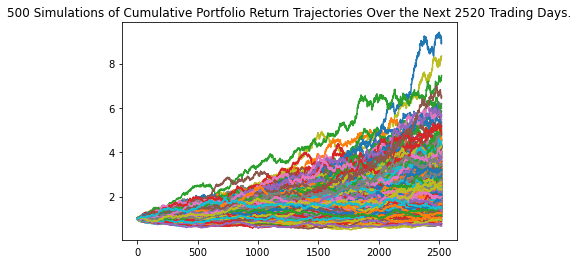

In [39]:
# Plot simulation outcomes
MC_10year.plot_simulation();

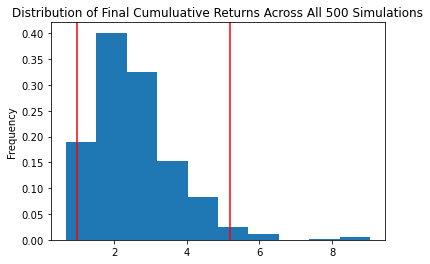

In [40]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution();

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10year_tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(MC_10year_tbl)

count           500.000000
mean              2.562101
std               1.142545
min               0.671088
25%               1.747985
50%               2.372902
75%               3.142895
max               9.046902
95% CI Lower      0.978082
95% CI Upper      5.189902
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment_10year = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10year = round(MC_10year_tbl[8]*initial_investment_10year,2)
ci_upper_10year = round(MC_10year_tbl[9]*initial_investment_10year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10year} and ${ci_upper_10year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58684.9 and $311394.14
